In [2]:
import pandas as pd
import numpy as np

from nba_api.stats.static import players
from nba_api.stats.static import teams 

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',250)

In [3]:
teams_dict = teams.get_teams()
teams = pd.DataFrame(teams_dict)
teams.head()


,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [4]:
player_dict = players.get_players()
players = pd.DataFrame(player_dict)
players.head()

,id,full_name,first_name,last_name,is_active
0,76001,Alaa Abdelnaby,Alaa,Abdelnaby,False
1,76002,Zaid Abdul-Aziz,Zaid,Abdul-Aziz,False
2,76003,Kareem Abdul-Jabbar,Kareem,Abdul-Jabbar,False
3,51,Mahmoud Abdul-Rauf,Mahmoud,Abdul-Rauf,False
4,1505,Tariq Abdul-Wahad,Tariq,Abdul-Wahad,False


In [39]:
curryID = players.id[players.full_name == 'Stephen Curry'].to_list()
curryID = curryID[0]


In [41]:
from nba_api.stats.endpoints import playercareerstats
curryCareer = playercareerstats.PlayerCareerStats(player_id = curryID)
curryCareer = curryCareer.get_data_frames()[0]
curryCareer

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,201939,2009-10,00,1610612744,GSW,22.0,80,77,2896.0,528,1143,0.462,166,380,0.437,177,200,0.885,48,308,356,472,152,19,243,252,1399
1,201939,2010-11,00,1610612744,GSW,23.0,74,74,2489.0,505,1053,0.480,151,342,0.442,212,227,0.934,52,234,286,432,109,20,226,233,1373
2,201939,2011-12,00,1610612744,GSW,24.0,26,23,732.0,145,296,0.490,55,121,0.455,38,47,0.809,15,73,88,138,39,8,65,62,383
3,201939,2012-13,00,1610612744,GSW,25.0,78,78,2983.0,626,1388,0.451,272,600,0.453,262,291,0.900,59,255,314,539,126,12,240,198,1786
4,201939,2013-14,00,1610612744,GSW,26.0,78,78,2846.0,652,1383,0.471,261,615,0.424,308,348,0.885,46,288,334,666,128,14,294,194,1873
5,201939,2014-15,00,1610612744,GSW,27.0,80,80,2613.0,653,1341,0.487,286,646,0.443,308,337,0.914,56,285,341,619,163,16,249,158,1900
6,201939,2015-16,00,1610612744,GSW,28.0,79,79,2700.0,805,1598,0.504,402,886,0.454,363,400,0.908,68,362,430,527,169,15,262,161,2375
7,201939,2016-17,00,1610612744,GSW,29.0,79,79,2639.0,675,1443,0.468,324,789,0.411,325,362,0.898,61,292,353,524,142,17,239,183,1999
8,201939,2017-18,00,1610612744,GSW,30.0,51,51,1631.0,428,864,0.495,212,501,0.423,278,302,0.921,36,225,261,310,80,8,153,114,1346
9,201939,2018-19,00,1610612744,GSW,31.0,69,69,2331.0,632,1340,0.472,354,810,0.437,263,287,0.916,45,324,369,361,92,25,192,166,1881


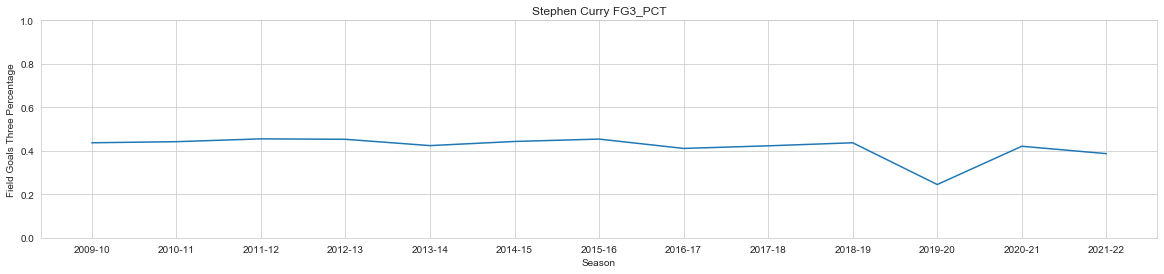

In [49]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,4))
c = sns.lineplot(data = curryCareer, x='SEASON_ID',y='FG3_PCT',)
plt.xlabel('Season')
plt.ylabel('Field Goals Three Percentage')
plt.title('Stephen Curry FG3_PCT')
plt.ylim(0,1)
plt.show(c)

In [51]:
curryCareer.FG3_PCT.mean()

0.41784615384615387